In [52]:
from io import BytesIO

import matplotlib.pyplot as plt
import requests
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from torch import nn


In [53]:
torch.manual_seed(42)

# batch_len=3, in_channels=1, длина=9
x = torch.tensor(
    [
        [
            list(range(1, 10)),
        ],
        [
            list(range(1, 10)),
        ],
        [
            list(range(1, 10)),
        ],
    ],
    dtype=torch.float32,
)

conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3)
print(f"Размерность входных данных: {x.shape}")
print(f"Размерность ядра свертки: {conv.weight.shape}")
print(f"Размерность выходных данных после свертки {conv(x).shape}")

Размерность входных данных: torch.Size([3, 1, 9])
Размерность ядра свертки: torch.Size([1, 1, 3])
Размерность выходных данных после свертки torch.Size([3, 1, 7])


После свертки получается один батч длинной три по одной строке и семью элементами -> 2 элемента было свернуто.

In [54]:
torch.manual_seed(42)

# batch_len=1, in_channels=2, длина=9
x = torch.tensor(
    [
        [
            list(range(1, 10)),
            list(range(11, 20)),
        ],
    ],
    dtype=torch.float32,
)

conv = nn.Conv1d(in_channels=2, out_channels=4, kernel_size=3)
print(f"Размерность входных данных: {x.shape}")
print(f"Размерность ядра свертки: {conv.weight.shape}")
print(conv(x))
print(f"Размерность выходных данных после свертки {conv(x).shape}")

Размерность входных данных: torch.Size([1, 2, 9])
Размерность ядра свертки: torch.Size([4, 2, 3])
tensor([[[ 4.5034e+00,  5.4267e+00,  6.3500e+00,  7.2733e+00,  8.1966e+00,
           9.1199e+00,  1.0043e+01],
         [ 3.1292e+00,  3.6618e+00,  4.1944e+00,  4.7271e+00,  5.2597e+00,
           5.7924e+00,  6.3250e+00],
         [ 4.8144e+00,  5.6856e+00,  6.5568e+00,  7.4280e+00,  8.2991e+00,
           9.1703e+00,  1.0041e+01],
         [ 2.1204e-01, -5.4470e-03, -2.2294e-01, -4.4043e-01, -6.5792e-01,
          -8.7541e-01, -1.0929e+00]]], grad_fn=<ConvolutionBackward0>)
Размерность выходных данных после свертки torch.Size([1, 4, 7])


In [55]:
torch.manual_seed(42)

# batch_len=1, in_channels=2, длина=9
x = torch.tensor(
    [
        [
            [
                list(range(1, 10)),
                list(range(11, 20)),
                list(range(1, 10)),
                list(range(11, 20)),
            ],
        ],
    ],
    dtype=torch.float32,
)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
print(f"Размерность входных данных: {x.shape}")
print(f"Размерность ядра свертки: {conv.weight.shape}")
print(f"Размерность выходных данных после свертки {conv(x).shape}")

Размерность входных данных: torch.Size([1, 1, 4, 9])
Размерность ядра свертки: torch.Size([1, 1, 3, 3])
Размерность выходных данных после свертки torch.Size([1, 1, 2, 7])


In [56]:
img_uri = "https://fastly.picsum.photos/id/1/200/300.jpg?hmac=jH5bDkLr6Tgy3oAg5khKCHeunZMHq0ehBZr6vGifPLY"
response = requests.get(img_uri, timeout=10)
img = Image.open(BytesIO(response.content)).convert("RGB")  # загрузили и в RGB

In [57]:
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img).unsqueeze(0)
print(img_tensor.shape)

torch.Size([1, 3, 300, 200])


Размерность ДО torch.Size([300, 200])
Размерность ПОСЛЕ torch.Size([50, 34])


(np.float64(-0.5), np.float64(33.5), np.float64(49.5), np.float64(-0.5))

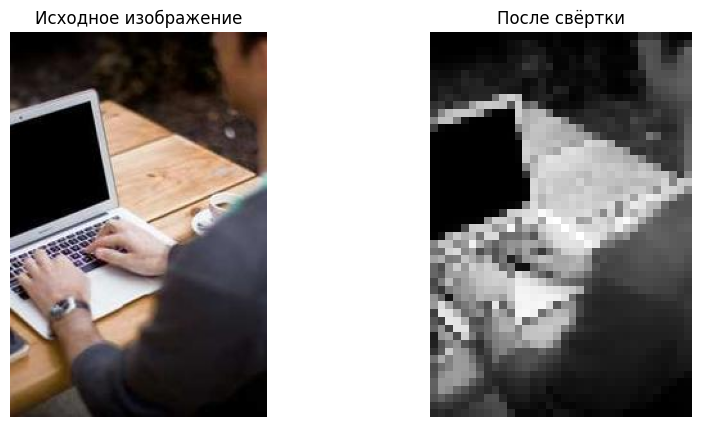

In [58]:
torch.manual_seed(42)
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1, stride=6)
with torch.no_grad():
    conv.weight[:] = 1.0
    conv.bias[:] = 0
# Применяем свёртку
output = conv(img_tensor)

# Уберём batch размер, получим [1, H, W]
output_img = output.squeeze(0).squeeze(0)
# Нормализуем результат для отображения [0..1]
output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min())

print(f"Размерность ДО {img_tensor.shape[2:]}")
print(f"Размерность ПОСЛЕ {output_img.shape}")

# Отобразим исходное и свернутое изображение
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_tensor.squeeze(0).permute(1, 2, 0))
axs[0].set_title("Исходное изображение")
axs[0].axis("off")

axs[1].imshow(output_img.detach(), cmap="gray")
axs[1].set_title("После свёртки")
axs[1].axis("off")

In [59]:
304 / 6, 204 / 6

(50.666666666666664, 34.0)

Размерность ДО torch.Size([300, 200])
Размерность ПОСЛЕ torch.Size([300, 200])


(np.float64(-0.5), np.float64(199.5), np.float64(299.5), np.float64(-0.5))

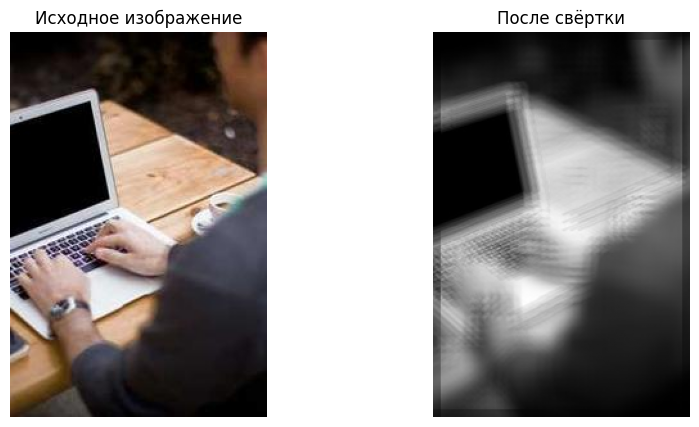

In [60]:
torch.manual_seed(42)
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=6, dilation=6)
with torch.no_grad():
    conv.weight[:] = 1.0
    conv.bias[:] = 0
# Применяем свёртку
output = conv(img_tensor)

# Уберём batch размер, получим [1, H, W]
output_img = output.squeeze(0).squeeze(0)
# Нормализуем результат для отображения [0..1]
output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min())

print(f"Размерность ДО {img_tensor.shape[2:]}")
print(f"Размерность ПОСЛЕ {output_img.shape}")

# Отобразим исходное и свернутое изображение
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_tensor.squeeze(0).permute(1, 2, 0))  # C,H,W -> H,W,C
axs[0].set_title("Исходное изображение")
axs[0].axis("off")

axs[1].imshow(output_img.detach(), cmap="gray")
axs[1].set_title("После свёртки")
axs[1].axis("off")

Размерность ДО torch.Size([300, 200])
Размерность ПОСЛЕ torch.Size([49, 32])


(np.float64(-0.5), np.float64(31.5), np.float64(48.5), np.float64(-0.5))

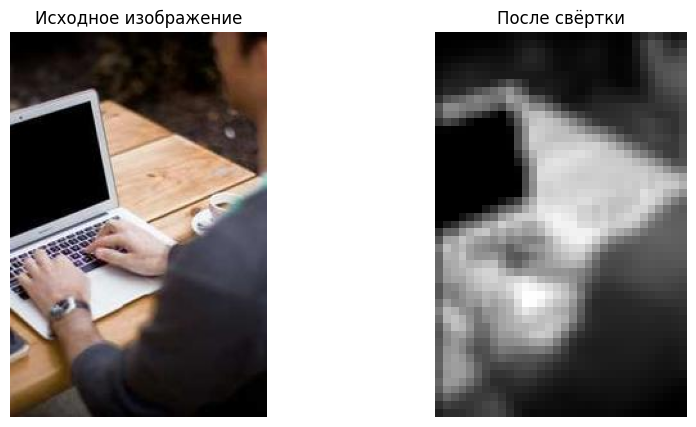

In [61]:
torch.manual_seed(42)
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1, stride=6, dilation=6)
with torch.no_grad():
    conv.weight[:] = 1.0
    conv.bias[:] = 0
# Применяем свёртку
output = conv(img_tensor)

# Уберём batch размер, получим [1, H, W]
output_img = output.squeeze(0).squeeze(0)
# Нормализуем результат для отображения [0..1]
output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min())

print(f"Размерность ДО {img_tensor.shape[2:]}")
print(f"Размерность ПОСЛЕ {output_img.shape}")

# Отобразим исходное и свернутое изображение
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_tensor.squeeze(0).permute(1, 2, 0))
axs[0].set_title("Исходное изображение")
axs[0].axis("off")

axs[1].imshow(output_img.detach(), cmap="gray")
axs[1].set_title("После свёртки")
axs[1].axis("off")

torch.Size([3, 3, 3, 3])
torch.Size([3, 3, 3, 3])
Размерность ДО torch.Size([300, 200])
Размерность ПОСЛЕ torch.Size([3, 49, 32])


(np.float64(-0.5), np.float64(31.5), np.float64(48.5), np.float64(-0.5))

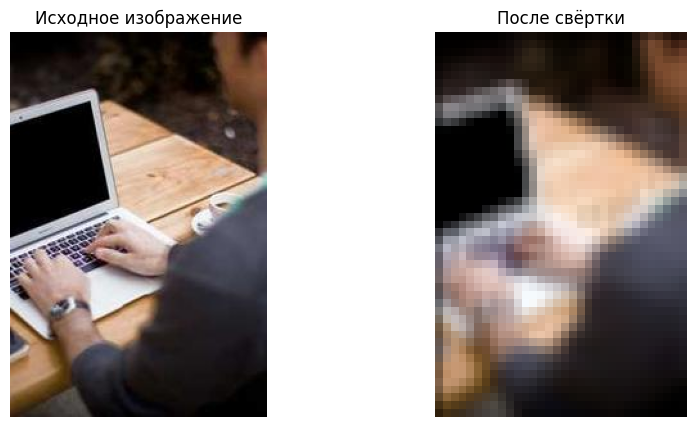

In [ ]:
torch.manual_seed(42)
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=1, stride=6, dilation=6)
with torch.no_grad():
    print(conv.weight.shape)
    conv.weight[0] = torch.tensor(
        [  # фильтр для красного канала
            [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
        ],
    )
    conv.weight[1] = torch.tensor(
        [  # фильтр для зелёного канала
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
            [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
        ],
    )
    conv.weight[2] = torch.tensor(
        [  # фильтр для синего канала
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
            [[1, 1, 1], [1, 1, 1], [1, 1, 1]],
        ],
    )
    print(conv.weight.shape)
    conv.bias[:] = 0
# Применяем свёртку
output = conv(img_tensor)

# Применяем свёртку
output = conv(img_tensor)  # shape: [1, 3, H, W]

# Отбрасываем batch
output = output.squeeze(0)  # shape: [3, H, W]

# Перекладываем каналы на последнее место для matplotlib
output = output.permute(1, 2, 0)  # shape: [H, W, 3]

# Нормализация к 0-1 для отображения
output_min = output.min()
output_max = output.max()
output = (output - output_min) / (output_max - output_min)


print(f"Размерность ДО {img_tensor.shape[2:]}")
print(f"Размерность ПОСЛЕ {output_img.shape}")

# Отобразим исходное и свернутое изображение
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_tensor.squeeze(0).permute(1, 2, 0))
axs[0].set_title("Исходное изображение")
axs[0].axis("off")

axs[1].imshow(output.detach(), cmap="gray")
axs[1].set_title("После свёртки")
axs[1].axis("off")